# Method 3 - Clustering

In [ ]:
# Basic data handling and scientific computing
import pandas as pd
import numpy as np

# Statistical tools
from scipy.stats import boxcox

# Machine Learning: Model and preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.mixture import GaussianMixture

# Sampling technique for imbalanced datasets
from imblearn.over_sampling import SMOTE

# Model training and evaluation tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score, silhouette_score
)

# Data visualization libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Jupyter widgets for interactive plots
import ipywidgets as widgets
from ipywidgets import VBox, HBox
from IPython.display import display

# Progress bar
from tqdm import tqdm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# card_df = pd.read_csv('/Users/xiaofanjiao/Desktop/Variant III.csv')


card_df = pd.read_csv('/content/drive/MyDrive/Variant III.csv')
card_org = card_df.copy()


In [ ]:
# Selecting the desired variables
selected_variables = ['fraud_bool','income', 'name_email_similarity', 'prev_address_months_count',
                      'current_address_months_count', 'customer_age',
                      'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h',
                      'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free',
                      'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'foreign_request',
                      'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w']

# Creating a new dataset with selected variables
new_dataset = card_org[selected_variables].copy()
new_dataset.head()

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.5               0.489311                         24   
1           0     0.9               0.535394                         -1   
2           0     0.5               0.188964                         -1   
3           0     0.4               0.391397                         29   
4           0     0.1               0.592711                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            20            50            0.019819   
1                            82            40            0.007959   
2                            73            60            0.027117   
3                             5            20            0.021103   
4                           267            40            0.039380   

   intended_balcon_amount  zip_count_4w  velocity_6h  ...  credit_risk_score  \
0               -0.857899          1842  1035.647957  ...                151   
1               -1.560356          1241  6594.341545  ...                209   
2               -0.897317          1095  9466.532445  ...                106   
3               -0.473215           888  9607.127166  ...                243   
4               16.213862           599  7747.526433  ...                157   

   email_is_free  phone_home_valid  phone_mobile_valid  bank_months_count  \
0              0                 0                   1                 -1   
1              0                 0                   1                 20   
2              1                 1                   1                 -1   
3              1                 1                   1                  2   
4              1                 0                   1                 28   

   has_other_cards  foreign_request  session_length_in_minutes  \
0                0                0                   1.873109   
1                0                0                  20.170591   
2                0                0                   1.722109   
3                0                0                   2.152433   
4                0                0                  14.204698   

   keep_alive_session  device_distinct_emails_8w  
0                   0                          1  
1                   1                          1  
2                   1                          1  
3                   1                          1  
4                   0                          1  

[5 rows x 22 columns]

In [ ]:
categorical_data = new_dataset[['email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session']]
numerical_data = new_dataset[['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']]

## Scale Numerical Data

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Convert the scaled data back to a dataframe
scaled_numerical_data = pd.DataFrame(scaled_numerical_data, columns=numerical_data.columns)

# Print the first five rows of the scaled data
scaled_numerical_data.head()

income  name_email_similarity  prev_address_months_count  \
0   0.500               0.489311                     0.0625   
1   1.000               0.535394                     0.0000   
2   0.500               0.188964                     0.0000   
3   0.375               0.391397                     0.0750   
4   0.000               0.592711                     0.0000   

   current_address_months_count  customer_age  days_since_request  \
0                      0.048837         0.500            0.000259   
1                      0.193023         0.375            0.000104   
2                      0.172093         0.625            0.000354   
3                      0.013953         0.125            0.000276   
4                      0.623256         0.375            0.000514   

   intended_balcon_amount  zip_count_4w  velocity_6h  bank_branch_count_8w  \
0                0.115865      0.276884     0.071460              0.000000   
1                0.110396      0.186494     0.399812              0.074464   
2                0.115558      0.164536     0.569473              0.000421   
3                0.118860      0.133404     0.577778              0.008414   
4                0.248779      0.089938     0.467931              0.002524   

   date_of_birth_distinct_emails_4w  credit_risk_score  bank_months_count  \
0                          0.025641           0.580531           0.000000   
1                          0.179487           0.683186           0.636364   
2                          0.102564           0.500885           0.000000   
3                          0.358974           0.743363           0.090909   
4                          0.358974           0.591150           0.878788   

   session_length_in_minutes  device_distinct_emails_8w  
0                   0.033189                   0.666667  
1                   0.244555                   0.666667  
2                   0.031445                   0.666667  
3                   0.036416                   0.666667  
4                   0.175639                   0.666667

# For Simplicity, we only use the numeric data

## PCA

In [ ]:

# Initialize PCA with 3 components
pca = PCA(n_components=3)

# Apply PCA to the data
pca_results = pca.fit_transform(scaled_numerical_data)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2', 'PC3'])

pca_df.head(10)

PC1       PC2       PC3
0 -0.380638  0.097521 -0.031286
1  0.220290 -0.412616  0.080694
2 -0.360808  0.103747 -0.320610
3 -0.295340  0.254268 -0.113691
4  0.565210  0.570003  0.096914
5 -0.352544  0.151128  0.299215
6  0.625321  0.556587  0.061825
7  0.451311  0.155477 -0.492355
8 -0.326013  0.034730 -0.169650
9  0.438678 -0.412341  0.528078

In [ ]:


# Initialize PCA with 3 components
pca = PCA(n_components=3)

# Apply PCA to the data
pca.fit_transform(scaled_numerical_data)

# Getting the loadings
loadings = pca.components_.T

# Creating a DataFrame for loadings
loadings_df = pd.DataFrame(data=loadings, columns=['PC1', 'PC2', 'PC3'], index=scaled_numerical_data.columns)

# Analyze the loadings
print("Top contributing variables for each principal component:")
for i, pc in enumerate(['PC1', 'PC2', 'PC3']):
    print(f"\n{pc}:")
    top_features = loadings_df[pc].abs().sort_values(ascending=False).head()
    print(top_features)


Top contributing variables for each principal component:

PC1:
bank_months_count               0.983352
bank_branch_count_8w            0.112727
intended_balcon_amount          0.087190
income                          0.077892
current_address_months_count    0.063490
Name: PC1, dtype: float64

PC2:
income                   0.985643
bank_months_count        0.074865
name_email_similarity    0.074499
credit_risk_score        0.069060
velocity_6h              0.063970
Name: PC2, dtype: float64

PC3:
name_email_similarity           0.992826
income                          0.074346
current_address_months_count    0.067630
credit_risk_score               0.041826
intended_balcon_amount          0.030957
Name: PC3, dtype: float64


# Model 1 K-means without PCA (only take the top columns from each PCA)



In [ ]:
selected_data = scaled_numerical_data[['income', 'bank_months_count', 'name_email_similarity']]

In [ ]:
selected_data.head()

income  bank_months_count  name_email_similarity
0   0.500           0.000000               0.489311
1   1.000           0.636364               0.535394
2   0.500           0.000000               0.188964
3   0.375           0.090909               0.391397
4   0.000           0.878788               0.592711

Elbow Method

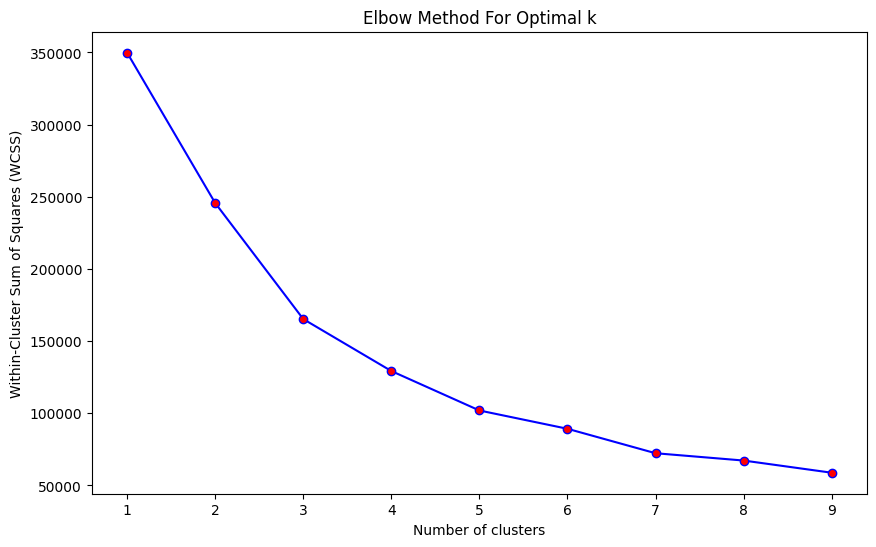

In [ ]:

k_values = range(1, 10)

# Initialize an empty list to store the WCSS for each value of k
wcss = []

# Compute WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(selected_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, 'bo-', markerfacecolor='red')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


From the elbow method, we set the cluster = 3 and then fit for k means

In [ ]:
num_clusters = 3

# Initialize KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init='auto')

# Fit KMeans on the PCA data
kmeans.fit(selected_data)

# Assign the clusters to each data point
clusters = kmeans.labels_

selected_data['cluster'] = clusters

<ipython-input-11-78f81824d725>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['cluster'] = clusters


In [ ]:
# Taking a random sample of the data
sample_indices = np.random.choice(selected_data.index, size=20000, replace=False)

sampled_pca_df = selected_data.loc[sample_indices]
sampled_clusters = clusters[sample_indices]

# Calculate Silhouette Score
silhouette_kmm_without = silhouette_score(sampled_pca_df, sampled_clusters)
print("The average silhouette score for the sample is :", silhouette_kmm_without)

The average silhouette score for the sample is : 0.6080384413335955


In [ ]:
# Create a cross-tabulation
cross_tab_km1 = pd.crosstab(new_dataset['fraud_bool'], selected_data['cluster'])

# Display the cross-tabulation
cross_tab_km1


cluster          0       1       2
fraud_bool                        
0           303659  386989  298322
1             1988    5483    3559

In [ ]:
# Calculate the Precision, Recall, F1 Score, and Specificity for the cross_tab_km

# Calculate Precision
precision_km_wo = cross_tab_km1[0][0] / (cross_tab_km1[0][0] + cross_tab_km1[1][0])

# Calculate Recall
recall_km_wo = cross_tab_km1[0][0] / (cross_tab_km1[0][0] + cross_tab_km1[0][1])

# Calculate F1 Score
f1_score_km_wo = 2 * (precision_km_wo * recall_km_wo) / (precision_km_wo + recall_km_wo)

# Calculate Specificity
specificity_km_wo = cross_tab_km1[1][1] / (cross_tab_km1[1][1] + cross_tab_km1[1][0])

# Print the results
print("Precision:", precision_km_wo)
print("Recall:", recall_km_wo)
print("F1 Score:", f1_score_km_wo)
print("Specificity:", specificity_km_wo)

Precision: 0.43967259732888536
Recall: 0.9934957647220486
F1 Score: 0.6095764808615923
Specificity: 0.013970423367781652


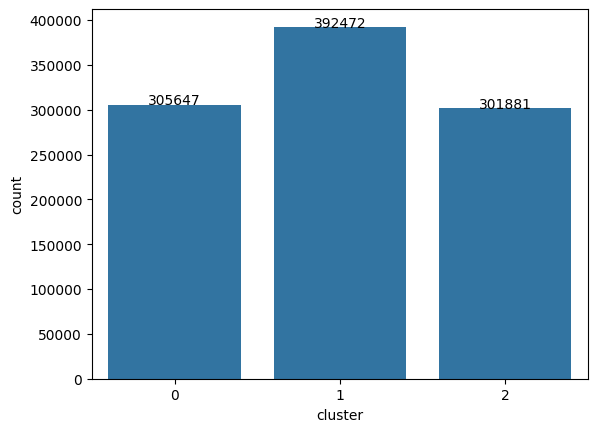

In [ ]:
sns.countplot(x='cluster', data=selected_data)

# Add the number of customers in each cluster on top of the bars
for i in range(selected_data['cluster'].nunique()):
    cluster_count = selected_data[selected_data['cluster'] == i].shape[0]
    plt.text(i, cluster_count + 50, cluster_count, ha='center')

plt.show()

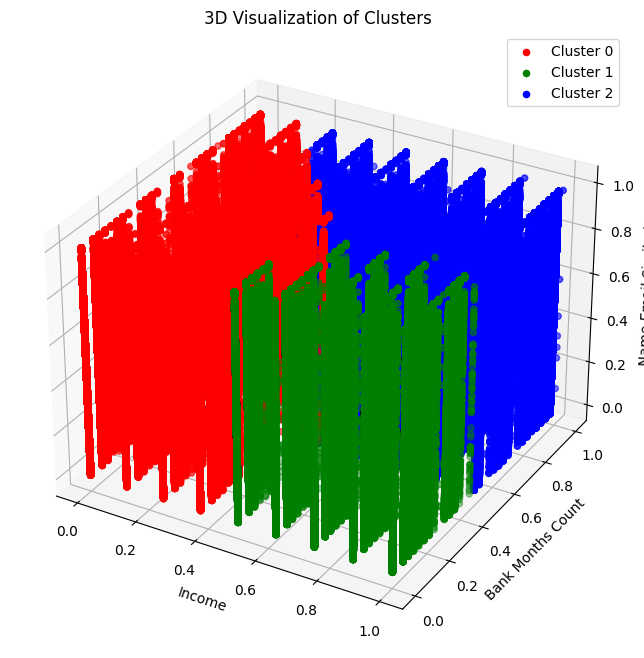

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']  # Colors for the clusters

# Scatter plot for each cluster
for i in range(num_clusters):
    # Select only data points that belong to the current cluster
    cluster_data = selected_data[clusters == i]
    ax.scatter(cluster_data['income'], cluster_data['bank_months_count'], cluster_data['name_email_similarity'],
               c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('Income')
ax.set_ylabel('Bank Months Count')
ax.set_zlabel('Name Email Similarity')
plt.title('3D Visualization of Clusters')
plt.legend()
plt.show()



In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
for k in tqdm(range(2, 11)):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    selected_data[f'cluster_{k}'] = kmeans.fit_predict(selected_data[['income', 'bank_months_count', 'name_email_similarity']])


# Define the widgets
sample_size_widget = widgets.IntSlider(min=1000, max=len(selected_data), step=1000, value=20000, description='Sample Size:')
opacity_widget = widgets.FloatSlider(min=0, max=1, step=0.1, value=0.8, description='Marker Opacity:')
colorscale_widget = widgets.Dropdown(options=['Viridis', 'Cividis', 'Blues', 'Greens'], value='Viridis', description='Color Scale:')

# Create an initial sample for the figure
initial_sample_indices = np.random.choice(selected_data.index, size=sample_size_widget.value, replace=False)
initial_sampled_pca_df = selected_data.loc[initial_sample_indices]

# Create a FigureWidget
fig = go.FigureWidget(
    data=go.Scatter3d(
        x=initial_sampled_pca_df['income'],
        y=initial_sampled_pca_df['bank_months_count'],
        z=initial_sampled_pca_df['name_email_similarity'],
        mode='markers',
        marker=dict(
            size=3,
            color=initial_sampled_pca_df['cluster'],
            colorscale=colorscale_widget.value,
            opacity=opacity_widget.value
        )
    ),
    layout=go.Layout(
        width=800,  # Specify the width here
        height=800,  # Specify the height here
        title='3D Scatter Plot'
    )
)



# Define a new widget for selecting the number of clusters
cluster_num_widget = widgets.Dropdown(
    options=list(range(2, 11)),
    value=4,
    description='Number of Clusters:'
)

# Define the fixed sample size
fixed_sample_size = 20000

# Update the plot function to use the fixed sample size and selected number of clusters
def update_plot(opacity, colorscale, cluster_num):
    sample_indices = np.random.choice(selected_data.index, size=fixed_sample_size, replace=False)
    sampled_pca_df = selected_data.loc[sample_indices]

    with fig.batch_update():
        fig.data[0].x = sampled_pca_df['income']
        fig.data[0].y = sampled_pca_df['bank_months_count']
        fig.data[0].z = sampled_pca_df['name_email_similarity']
        fig.data[0].marker.color = sampled_pca_df[f'cluster_{cluster_num}']
        fig.data[0].marker.colorscale = colorscale
        fig.data[0].marker.opacity = opacity
        fig.layout.title = f'K-Means Clustering with {cluster_num} Clusters (Sampled Data) without PCA'

# Bind the update_plot function to the widgets
interactive_plot = interactive(update_plot, opacity=opacity_widget,
                               colorscale=colorscale_widget, cluster_num=cluster_num_widget)

# Layout for displaying the widgets and the figure
vbox_layout = VBox([opacity_widget, colorscale_widget, cluster_num_widget, fig])
display(vbox_layout)


  0%|          | 0/9 [00:00<?, ?it/s]<ipython-input-18-fe8ce6dbdb07>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[f'cluster_{k}'] = kmeans.fit_predict(selected_data[['income', 'bank_months_count', 'name_email_similarity']])
 11%|█         | 1/9 [00:00<00:05,  1.54it/s]<ipython-input-18-fe8ce6dbdb07>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[f'cluster_{k}'] = kmeans.fit_predict(selected_data[['income', 'bank_months_count', 'name_email_similarity']])
 22%|██▏       | 2

# Model 1 - K-means with PCA

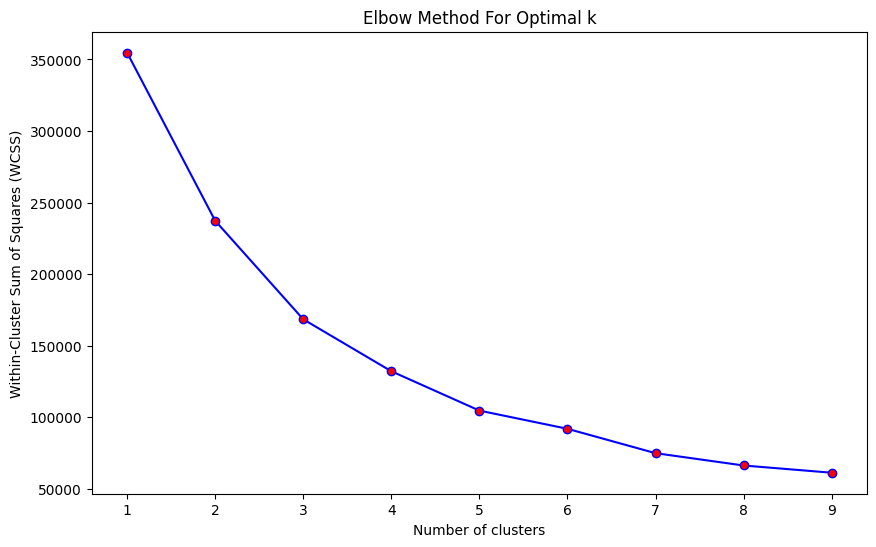

In [ ]:
# Determine the range of values for k (number of clusters)
k_values = range(1, 10)  # For example, testing k from 1 to 9

# Initialize an empty list to store the WCSS for each value of k
wcss = []

# Compute WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, 'bo-', markerfacecolor='red')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


Based on the Elbow Model, we decide to do 3 clusters

In [ ]:
num_clusters = 3

# Initialize KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init='auto')

# Fit KMeans on the PCA data
kmeans.fit(pca_df)

# Assign the clusters to each data point
clusters = kmeans.labels_

pca_df['cluster'] = clusters


## Evaluate K-means

### Cross-Tabulation with Known Labels

Since we have a labeled dataset (with the fraud_bool variable), we can use cross-tabulation to see how the clusters correspond to fraud and non-fraud cases. This won't tell if the number of clusters is optimal, but it can show if the clusters are meaningful in the context of specific problem.

In [ ]:
# Taking a random sample of the data
sample_indices = np.random.choice(pca_df.index, size=20000, replace=False)
# Sample size of 10,000 for example
sampled_pca_df = pca_df.loc[sample_indices]
sampled_clusters = clusters[sample_indices]

# Calculate Silhouette Score
silhouette_kmm_with = silhouette_score(sampled_pca_df, sampled_clusters)
print("The average silhouette score for the sample is :", silhouette_kmm_with)

The average silhouette score for the sample is : 0.6046604332937564


A score above 0.5 generally indicates that the clusters are somewhat distinct, but there could still be room for improvement. Remember, the Silhouette Score is a balancing act between cohesion (how close the points in a cluster are) and separation (how far each cluster is from the others).

This cross-tabulation can provide insights into how well the clusters formed by K-means align with the actual categories of fraud in your dataset. For example, if a particular cluster contains a high number of fraudulent transactions, it might suggest that the cluster is capturing some patterns associated with fraudulent behavior.

In [ ]:
# Create a cross-tabulation
cross_tab_km = pd.crosstab(new_dataset['fraud_bool'], pca_df['cluster'])

# Display the cross-tabulation
cross_tab_km


cluster          0       1       2
fraud_bool                        
0           253004  396051  339915
1             1602    5641    3787

In [ ]:
# Calculate the Precision, Recall, F1 Score, and Specificity for the cross_tab_km

# Calculate Precision
precision_km = cross_tab_km[0][0] / (cross_tab_km[0][0] + cross_tab_km[1][0])

# Calculate Recall
recall_km = cross_tab_km[0][0] / (cross_tab_km[0][0] + cross_tab_km[0][1])

# Calculate F1 Score
f1_score_km = 2 * (precision_km * recall_km) / (precision_km + recall_km)

# Calculate Specificity
specificity_km = cross_tab_km[1][1] / (cross_tab_km[1][1] + cross_tab_km[1][0])

# Print the results
print("Precision:", precision_km)
print("Recall:", recall_km)
print("F1 Score:", f1_score_km)
print("Specificity:", specificity_km)


Precision: 0.38980363759619757
Recall: 0.9937079251863664
F1 Score: 0.5599533453363595
Specificity: 0.014043097696742777


## See how many observations in each cluster

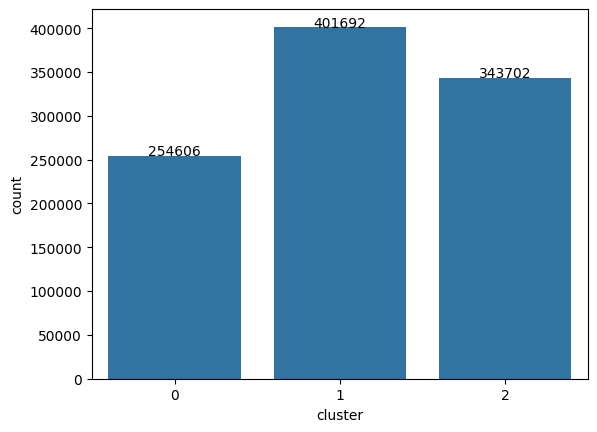

In [ ]:
sns.countplot(x='cluster', data=pca_df)

# Add the number of customers in each cluster on top of the bars
for i in range(pca_df['cluster'].nunique()):
    cluster_count = pca_df[pca_df['cluster'] == i].shape[0]
    plt.text(i, cluster_count + 50, cluster_count, ha='center')

plt.show()

## Plot

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



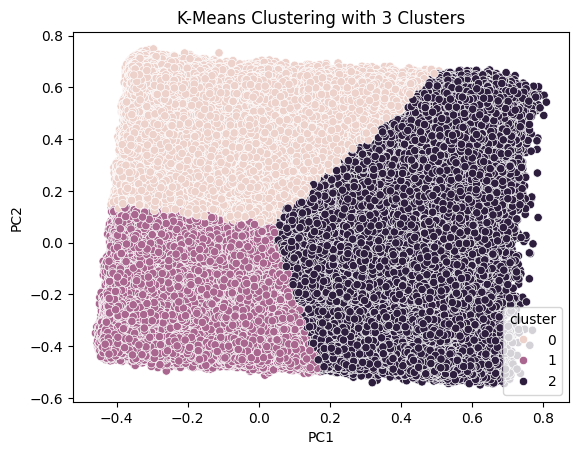

In [ ]:
# Create a scatter plot with different colors for each cluster
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df)
plt.title('K-Means Clustering with {} Clusters'.format(num_clusters))
plt.show()

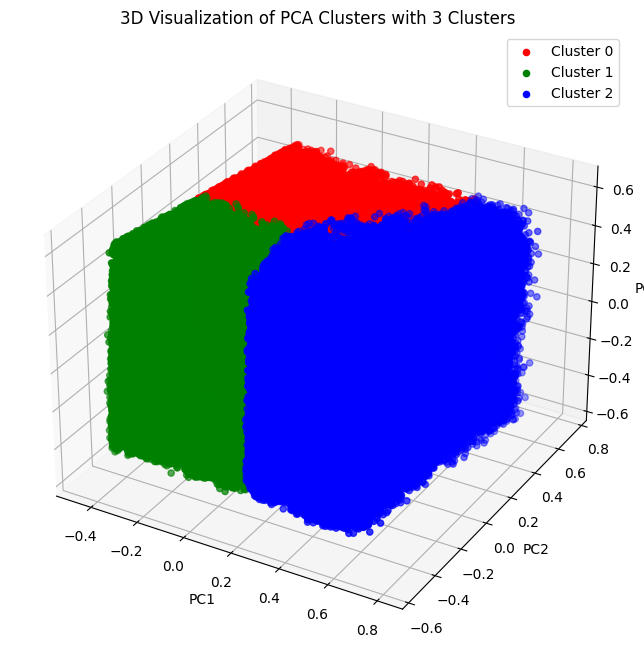

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# You can specify more colors if you have more than 3 clusters
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# Scatter plot for each cluster
for i in range(num_clusters):
    # Select only data points that belong to the current cluster
    cluster_data = pca_df[pca_df['cluster'] == i]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],
               c=colors[i % len(colors)], label=f'Cluster {i}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title(f'3D Visualization of PCA Clusters with {num_clusters} Clusters')
plt.legend()
plt.show()




## 3D Interactive plot

1. Cluster Selector: A dropdown menu to filter the plot by specific clusters.
2. Marker Size Slider: A slider to adjust the size of the markers.
3. Opacity Slider: A slider to adjust the opacity of the markers.

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
for k in tqdm(range(2, 11)):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    pca_df[f'cluster_{k}'] = kmeans.fit_predict(pca_df[['PC1', 'PC2', 'PC3']])


# Define the widgets
sample_size_widget = widgets.IntSlider(min=1000, max=len(pca_df), step=1000, value=20000, description='Sample Size:')
opacity_widget = widgets.FloatSlider(min=0, max=1, step=0.1, value=0.8, description='Marker Opacity:')
colorscale_widget = widgets.Dropdown(options=['Viridis', 'Cividis', 'Blues', 'Greens'], value='Viridis', description='Color Scale:')

# Create an initial sample for the figure
initial_sample_indices = np.random.choice(pca_df.index, size=sample_size_widget.value, replace=False)
initial_sampled_pca_df = pca_df.loc[initial_sample_indices]

# Create a FigureWidget
fig = go.FigureWidget(
    data=go.Scatter3d(
        x=initial_sampled_pca_df['PC1'],
        y=initial_sampled_pca_df['PC2'],
        z=initial_sampled_pca_df['PC3'],
        mode='markers',
        marker=dict(
            size=3,
            color=initial_sampled_pca_df['cluster'],
            colorscale=colorscale_widget.value,
            opacity=opacity_widget.value
        )
    ),
    layout=go.Layout(
        width=800,  # Specify the width here
        height=800,  # Specify the height here
        title='3D Scatter Plot'
    )
)



# Define a new widget for selecting the number of clusters
cluster_num_widget = widgets.Dropdown(
    options=list(range(2, 11)),
    value=4,
    description='Number of Clusters:'
)

# Define the fixed sample size
fixed_sample_size = 20000

# Update the plot function to use the fixed sample size and selected number of clusters
def update_plot(opacity, colorscale, cluster_num):
    sample_indices = np.random.choice(pca_df.index, size=fixed_sample_size, replace=False)
    sampled_pca_df = pca_df.loc[sample_indices]

    with fig.batch_update():
        fig.data[0].x = sampled_pca_df['PC1']
        fig.data[0].y = sampled_pca_df['PC2']
        fig.data[0].z = sampled_pca_df['PC3']
        fig.data[0].marker.color = sampled_pca_df[f'cluster_{cluster_num}']
        fig.data[0].marker.colorscale = colorscale
        fig.data[0].marker.opacity = opacity
        fig.layout.title = f'K-Means Clustering with {cluster_num} Clusters (Sampled Data)'

# Bind the update_plot function to the widgets
interactive_plot = interactive(update_plot, opacity=opacity_widget,
                               colorscale=colorscale_widget, cluster_num=cluster_num_widget)

# Layout for displaying the widgets and the figure
vbox_layout = VBox([opacity_widget, colorscale_widget, cluster_num_widget, fig])
display(vbox_layout)


100%|██████████| 9/9 [00:22<00:00,  2.48s/it]


# Model 2 - Gaussian Mixture Model

Elbow Method to see how many clusters

In [ ]:

# Determine the range of values for k (number of clusters)
k_values = range(1, 10)

# Initialize an empty list to store the BIC values for each k
bic_values = []

# Compute BIC for each k
for k in tqdm(k_values):
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=0, n_init=50)
    gmm.fit(pca_df)
    bic_values.append(gmm.bic(pca_df))

# Plotting the BIC values against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_values, bic_values, 'bo-', markerfacecolor='red')
plt.title('BIC Values for Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.show()


GMM is probabalistic, not a hard clustiering algarithom, therefore there are differences with K means


In [ ]:
# Initialize the Gaussian Mixture Model with 3 components
gmm = GaussianMixture(n_components=3, covariance_type = 'spherical', random_state=0)

# Fit the model to the PCA data
gmm.fit(pca_df)

# Assign the clusters to each data point
clusters_gmm = gmm.predict(pca_df)

pca_df['cluster_gmm'] = clusters_gmm

## Evaluate the GMM

### Cross-Tabulation with Known Labels

In [ ]:

# Taking a random sample of the data
sample_indices = np.random.choice(pca_df.index, size=20000, replace=False)
# Sample size of 10,000 for example
sampled_pca_df = pca_df.loc[sample_indices]
sampled_clusters_gmm = clusters_gmm[sample_indices]
# Calculate Silhouette Score
silhouette_gmm_with = silhouette_score(sampled_pca_df, sampled_clusters_gmm)
print("The average silhouette score for the sample is :", silhouette_gmm_with)


The average silhouette score for the sample is : 0.33922409829284705


In [ ]:
# Create a cross-tabulation
cross_tab_gmm = pd.crosstab(new_dataset['fraud_bool'], pca_df['cluster_gmm'])

# Display the cross-tabulation
print(cross_tab_gmm)


cluster_gmm      0       1       2
fraud_bool                        
0            88441  364327  536202
1              748    5085    5197


In [ ]:
# Calculate the Precision, Recall, F1 Score, and Specificity for the cross_tab_gmm

# Calculate Precision
precision_gmm = cross_tab_gmm[0][0] / (cross_tab_gmm[0][0] + cross_tab_gmm[1][0])

# Calculate Recall
recall_gmm = cross_tab_gmm[0][0] / (cross_tab_gmm[0][0] + cross_tab_gmm[0][1])

# Calculate F1 Score
f1_score_gmm = 2 * (precision_gmm * recall_gmm) / (precision_gmm + recall_gmm)

# Calculate Specificity
specificity_gmm = cross_tab_gmm[1][1] / (cross_tab_gmm[1][1] + cross_tab_gmm[1][0])

# Print the results
print("Precision:", precision_gmm)
print("Recall:", recall_gmm)
print("F1 Score:", f1_score_gmm)
print("Specificity:", specificity_gmm)


Precision: 0.19533403420736448
Recall: 0.9916133155433966
F1 Score: 0.3263764468398785
Specificity: 0.013765118620943553


### See how many cluster in each cluster

In [ ]:
## See how many cluster in each cluster

sns.countplot(x='cluster_gmm', data=pca_df)

# Add the number of customers in each cluster on top of the bars
for i in range(pca_df['cluster_gmm'].nunique()):
    cluster_count = pca_df[pca_df['cluster_gmm'] == i].shape[0]
    plt.text(i, cluster_count + 50, cluster_count, ha='center')

plt.show()

## Plot

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



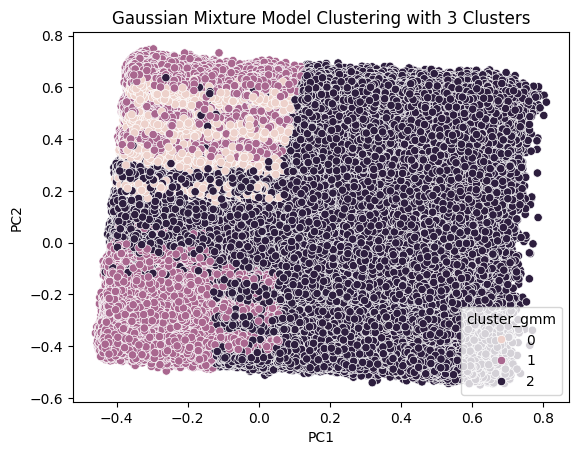

In [ ]:
# Create a scatter plot with different colors for each cluster
sns.scatterplot(x='PC1', y='PC2', hue='cluster_gmm', data=pca_df)
plt.title('Gaussian Mixture Model Clustering with {} Clusters'.format(3))
plt.show()

## 3D Plot

In [ ]:
# Sampling a subset of the data for visualization
sample_indices = np.random.choice(pca_df.index, size=10000, replace=False)
sampled_pca_df = pca_df.loc[sample_indices]

# Create a 3D scatter plot with different colors for each cluster
fig = go.Figure(data=go.Scatter3d(
    x=sampled_pca_df['PC1'],
    y=sampled_pca_df['PC2'],
    z=sampled_pca_df['PC3'],
    mode='markers',
    marker=dict(
        size=3,  # Reduced marker size
        color=sampled_pca_df['cluster_gmm'],  # assign a color to each cluster
        colorscale='Viridis',  # choose a color scale
        opacity=0.8
    )
))

# Update the layout of the figure
fig.update_layout(
    title=f'Gaussian Mixture Model Clustering with {3} Clusters (Sampled Data)',
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    )
)

# Show the plot
fig.show()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# Perform GMM clustering for different numbers of clusters and add them to the dataframe
for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=0)
    pca_df[f'cluster_gmm_{k}'] = gmm.fit_predict(pca_df[['PC1', 'PC2', 'PC3']])

# Create a fixed sample of the data for visualization
fixed_sample_indices = np.random.choice(pca_df.index, size=20000, replace=False)
fixed_sampled_pca_df = pca_df.loc[fixed_sample_indices]

# Define widgets for the interactive components
opacity_widget = widgets.FloatSlider(min=0, max=1, step=0.1, value=0.8, description='Marker Opacity:')
colorscale_widget = widgets.Dropdown(options=['Viridis', 'Cividis', 'Blues', 'Greens'], value='Viridis', description='Color Scale:')
cluster_num_widget = widgets.Dropdown(options=list(range(2, 11)), value=3, description='Number of Clusters:')

# Create the initial figure widget
fig = go.FigureWidget(
    data=[go.Scatter3d(
        x=fixed_sampled_pca_df['PC1'],
        y=fixed_sampled_pca_df['PC2'],
        z=fixed_sampled_pca_df['PC3'],
        mode='markers',
        marker=dict(
            size=3,
            color=fixed_sampled_pca_df[f'cluster_gmm_3'],  # Start with 3 clusters
            colorscale='Viridis',
            opacity=0.8
        )
    )]
)

# Update the layout of the figure
fig.update_layout(
    title='Gaussian Mixture Model Clustering (Sampled Data)',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

# Define the update function
def update_plot(cluster_num, colorscale, opacity):
    with fig.batch_update():
        fig.data[0].marker.color = fixed_sampled_pca_df[f'cluster_gmm_{cluster_num}']
        fig.data[0].marker.colorscale = colorscale
        fig.data[0].marker.opacity = opacity
        fig.layout.title = f'Gaussian Mixture Model Clustering with {cluster_num} Clusters (Sampled Data)'

# Bind the update function to the widgets
interactive_widget = interactive(update_plot, cluster_num=cluster_num_widget, colorscale=colorscale_widget, opacity=opacity_widget)

# Display the widgets and the interactive figure
vbox_layout = VBox([interactive_widget, fig])
display(vbox_layout)


# Model 2 GMM without PCA

In [ ]:
# # Determine the range of values for k (number of clusters)
# k_values = range(1, 10)  # For example, testing k from 1 to 9

# # Initialize an empty list to store the BIC values for each k
# bic_values = []

# # Compute BIC for each k
# for k in tqdm(k_values):
#     gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=0, n_init=100)
#     gmm.fit(selected_data)
#     bic_values.append(gmm.bic(selected_data))

# # Plotting the BIC values against the number of clusters
# plt.figure(figsize=(10, 6))
# plt.plot(k_values, bic_values, 'bo-', markerfacecolor='red')
# plt.title('BIC Values for Different Number of Clusters')
# plt.xlabel('Number of clusters')
# plt.ylabel('BIC')
# plt.show()


In [ ]:
# Initialize the Gaussian Mixture Model with 3 components
gmm = GaussianMixture(n_components=3, covariance_type = 'spherical', random_state=0)

# Fit the model to the PCA data
gmm.fit(selected_data)

# Assign the clusters to each data point
clusters_gmm = gmm.predict(selected_data)

selected_data['cluster_gmm'] = clusters_gmm

<ipython-input-45-2df86d3a39b3>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

# Taking a random sample of the data
sample_indices = np.random.choice(selected_data.index, size=20000, replace=False)
# Sample size of 10,000 for example
sampled_pca_df = selected_data.loc[sample_indices]
sampled_clusters_gmm = clusters_gmm[sample_indices]

# Calculate Silhouette Score
silhouette_gmm_without = silhouette_score(sampled_pca_df, sampled_clusters_gmm)
print("The average silhouette score for the sample is :", silhouette_gmm_without)


The average silhouette score for the sample is : 0.4421498948865218


In [ ]:
# Create a cross-tabulation
cross_tab_gmm1 = pd.crosstab(new_dataset['fraud_bool'], selected_data['cluster_gmm'])

# Display the cross-tabulation
print(cross_tab_gmm1)


cluster_gmm       0       1       2
fraud_bool                         
0            118539  754770  115661
1              1042    8412    1576


In [ ]:
# Calculate the Precision, Recall, F1 Score, and Specificity for the cross_tab_gmm1

# Calculate Precision
precision_gmm_wo = cross_tab_gmm1[0][0] / (cross_tab_gmm1[0][0] + cross_tab_gmm1[1][0])

# Calculate Recall
recall_gmm_wo = cross_tab_gmm1[0][0] / (cross_tab_gmm1[0][0] + cross_tab_gmm1[0][1])

# Calculate F1 Score
f1_score_gmm_wo = 2 * (precision_gmm * recall_gmm) / (precision_gmm + recall_gmm)

# Calculate Specificity
specificity_gmm_wo = cross_tab_gmm1[1][1] / (cross_tab_gmm1[1][1] + cross_tab_gmm1[1][0])

# Print the results
print("Precision:", precision_gmm_wo)
print("Recall:", recall_gmm_wo)
print("F1 Score:", f1_score_gmm_wo)
print("Specificity:", specificity_gmm_wo)


Precision: 0.13573546133155617
Recall: 0.9912862411252624
F1 Score: 0.3263764468398785
Specificity: 0.011022272537874321


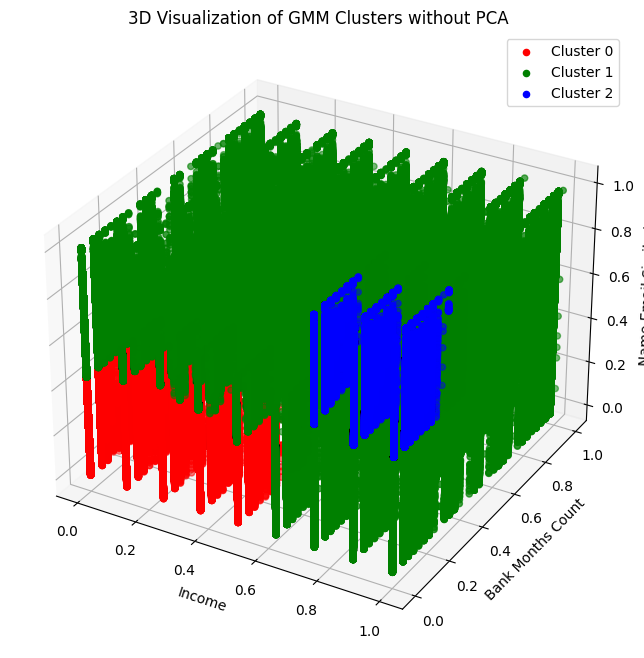

In [ ]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Colors for the clusters - modify if more than 3 clusters
colors = ['r', 'g', 'b']

# Plot each cluster with a different color
for cluster in range(3):  # Adjust the range if you have a different number of clusters
    cluster_data = selected_data[selected_data['cluster_gmm'] == cluster]
    ax.scatter(cluster_data['income'], cluster_data['bank_months_count'], cluster_data['name_email_similarity'],
               c=colors[cluster], label=f'Cluster {cluster}')

# Setting labels for axes
ax.set_xlabel('Income')
ax.set_ylabel('Bank Months Count')
ax.set_zlabel('Name Email Similarity')
plt.title('3D Visualization of GMM Clusters without PCA')
plt.legend()
plt.show()


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# Perform GMM clustering for different numbers of clusters and add them to the dataframe
for k in range(2, 11):  # You can adjust the range as needed
    gmm = GaussianMixture(n_components=k, random_state=0)
    selected_data[f'cluster_gmm_{k}'] = gmm.fit_predict(selected_data[['income', 'bank_months_count', 'name_email_similarity']])

# Create a fixed sample of the data for visualization
fixed_sample_indices = np.random.choice(selected_data.index, size=20000, replace=False)
fixed_sampled_data = selected_data.loc[fixed_sample_indices]

# Define widgets for the interactive components
opacity_widget = widgets.FloatSlider(min=0, max=1, step=0.1, value=0.8, description='Marker Opacity:')
colorscale_widget = widgets.Dropdown(options=['Viridis', 'Cividis', 'Blues', 'Greens'], value='Viridis', description='Color Scale:')
cluster_num_widget = widgets.Dropdown(options=list(range(2, 11)), value=3, description='Number of Clusters:')

# Create the initial figure widget
fig = go.FigureWidget(
    data=[go.Scatter3d(
        x=fixed_sampled_data['income'],
        y=fixed_sampled_data['bank_months_count'],
        z=fixed_sampled_data['name_email_similarity'],
        mode='markers',
        marker=dict(
            size=3,
            color=fixed_sampled_data[f'cluster_gmm_3'],  # Start with 3 clusters
            colorscale='Viridis',
            opacity=0.8
        )
    )]
)

# Update the layout of the figure
fig.update_layout(
    title='3D Visualization of GMM Clusters',
    scene=dict(
        xaxis_title='Income',
        yaxis_title='Bank Months Count',
        zaxis_title='Name Email Similarity'
    )
)

# Define the update function
def update_plot(cluster_num, colorscale, opacity):
    with fig.batch_update():
        fig.data[0].marker.color = fixed_sampled_data[f'cluster_gmm_{cluster_num}']
        fig.data[0].marker.colorscale = colorscale
        fig.data[0].marker.opacity = opacity
        fig.layout.title = f'3D Visualization of GMM Clusters with {cluster_num} Clusters'

# Bind the update function to the widgets
interactive_widget = interactive(update_plot, cluster_num=cluster_num_widget, colorscale=colorscale_widget, opacity=opacity_widget)

# Display the widgets and the interactive figure
vbox_layout = VBox([interactive_widget, fig])
display(vbox_layout)


# Comparison


In [ ]:
# Average Silhouette Scores DataFrame
silhouette_table_display = pd.DataFrame({
    'Model': ['K-Means with PCA', 'K-Means without PCA', 'Gaussian Mixture Model with PCA', 'Gaussian Mixture Model without PCA'],
    'Average Silhouette Score': [silhouette_kmm_with, silhouette_kmm_without, silhouette_gmm_with, silhouette_gmm_without]
})

silhouette_table_display


Model  Average Silhouette Score
0                    K-Means with PCA                  0.604660
1                 K-Means without PCA                  0.608038
2     Gaussian Mixture Model with PCA                  0.339224
3  Gaussian Mixture Model without PCA                  0.442150

In [ ]:
# Performance Metrics DataFrame
metrics_table_display = pd.DataFrame({
    'Model': ['K-Means with PCA', 'K-Means without PCA', 'Gaussian Mixture Model with PCA', 'Gaussian Mixture Model without PCA'],
    'Precision': [precision_km, precision_km_wo, precision_gmm, precision_gmm_wo],
    'Recall': [recall_km, recall_km_wo, recall_gmm, recall_gmm_wo],
    'F1 Score': [f1_score_km, f1_score_km_wo, f1_score_gmm, f1_score_gmm_wo],
    'Specificity': [specificity_km, specificity_km_wo, specificity_gmm, specificity_gmm_wo]
})

metrics_table_display

Model  Precision    Recall  F1 Score  \
0                    K-Means with PCA   0.389804  0.993708  0.559953   
1                 K-Means without PCA   0.439673  0.993496  0.609576   
2     Gaussian Mixture Model with PCA   0.195334  0.991613  0.326376   
3  Gaussian Mixture Model without PCA   0.135735  0.991286  0.326376   

   Specificity  
0     0.014043  
1     0.013970  
2     0.013765  
3     0.011022

# Combined plot

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# Rename the columns to 'PC1', 'PC2', 'PC3'
pca_df.columns = ['PC1', 'PC2', 'PC3', 'cluster']  # Make sure the order is correct

# KMeans without PCA
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    selected_data[f'kmeans_cluster_{k}'] = kmeans.fit_predict(selected_data[['income', 'bank_months_count', 'name_email_similarity']])

# KMeans with PCA
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    pca_df[f'kmeans_pca_cluster_{k}'] = kmeans.fit_predict(pca_df[['PC1', 'PC2', 'PC3']])
# GMM without PCA
for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=0)
    selected_data[f'gmm_cluster_{k}'] = gmm.fit_predict(selected_data[['income', 'bank_months_count', 'name_email_similarity']])

# GMM with PCA
for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=0)
    pca_df[f'gmm_pca_cluster_{k}'] = gmm.fit_predict(pca_df[['PC1', 'PC2', 'PC3']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
# First set of RadioButtons for selecting the model type
model_type_widget = widgets.RadioButtons(
    options=['KMeans', 'GMM'],
    description='Model Type:',
    layout={'width': 'max-content'}
)

# Second set of RadioButtons for selecting PCA or no PCA
pca_widget = widgets.RadioButtons(
    options=['No PCA', 'PCA'],
    description="PCA:",
    layout={'width': 'max-content'}
)

# Dropdown to select the number of clusters
cluster_num_widget = widgets.Dropdown(
    options=list(range(2, 11)),
    value=3,
    description='Number of Clusters:'
)

# Dropdown to select the colorscale
colorscale_widget = widgets.Dropdown(
    options=['Viridis', 'Cividis', 'Rainbow', 'Plasma'],
    value='Viridis',
    description='Color Scale:'
)

# Opacity slider
opacity_widget = widgets.FloatSlider(
    min=0, max=1, step=0.1, value=0.8, description='Marker Opacity:'
)

def update_plot(model_type, pca, cluster_num, colorscale, opacity):
    model = f"{model_type}_{'PCA' if pca == 'PCA' else 'no_PCA'}"
    if model == 'KMeans_no_PCA' or model == 'GMM_no_PCA':
        data = selected_data
        cluster_label = f'kmeans_cluster_{cluster_num}' if 'KMeans' in model else f'gmm_cluster_{cluster_num}'
        x_title, y_title, z_title = 'Income', 'Bank Months Count', 'Name Email Similarity'
    else:  # PCA models
        data = pca_df
        cluster_label = f'kmeans_pca_cluster_{cluster_num}' if 'KMeans' in model else f'gmm_pca_cluster_{cluster_num}'
        x_title, y_title, z_title = 'PC1', 'PC2', 'PC3'

    if cluster_label not in data.columns:
        print(f"Column {cluster_label} does not exist in the data.")
        return

    subset = data.sample(n=20000, random_state=42)
    x = subset['income'].tolist() if 'income' in subset.columns else subset['PC1'].tolist()
    y = subset['bank_months_count'].tolist() if 'bank_months_count' in subset.columns else subset['PC2'].tolist()
    z = subset['name_email_similarity'].tolist() if 'name_email_similarity' in subset.columns else subset['PC3'].tolist()
    color = subset[cluster_label].tolist()

    new_fig = go.FigureWidget(
            data=[go.Scatter3d(
                x=x,
                y=y,
                z=z,
                mode='markers',
                marker=dict(
                    size=5,
                    color=color,
                    colorscale=colorscale,
                    opacity=opacity
                )
            )],
            layout=go.Layout(
                title=f'Clustering with {cluster_num} Clusters using {model}',
                scene=dict(
                    xaxis_title=x_title,
                    yaxis_title=y_title,
                    zaxis_title=z_title
                )
            )
     )

    with output_widget:
      output_widget.clear_output(wait=True)
      display(new_fig)

# Update the interactive_output to include the new widgets
interactive_plot = widgets.interactive_output(update_plot, {
    'model_type': model_type_widget,
    'pca': pca_widget,
    'cluster_num': cluster_num_widget,
    'colorscale': colorscale_widget,
    'opacity': opacity_widget
})

# Create the output widget for displaying the plot
output_widget = widgets.Output()

# Display the interactive plot inside the output widget
with output_widget:
    display(interactive_plot)

# Show the output widget
display(output_widget)

# Arrange the widgets into a layout with the new structure
widgets_layout = VBox([
    HBox([model_type_widget, pca_widget]),  # Put these on the same line
    HBox([cluster_num_widget, colorscale_widget, opacity_widget]),
    output_widget  # Keep the plot display here
])
# Display the layout with widgets
display(widgets_layout)


Output()

This notebook aims to explore different clustering algorithms and compare their performance on a given dataset. The primary focus is on K-Means and Gaussian Mixture Model (GMM) clustering, both with and without Principal Component Analysis (PCA) for dimensionality reduction.

1. **Data Preparation:**
   - The notebook assumes a dataset called `selected_data` containing relevant features for clustering.
   - It also includes `new_dataset` with a binary fraud indicator (`fraud_bool`).

2. **K-Means Clustering:**
   - K-Means clustering is performed with varying numbers of clusters (2 to 10) for both the original data and the PCA-transformed data.
   - The optimal number of clusters is determined based on the Bayesian Information Criterion (BIC).

3. **Gaussian Mixture Model Clustering:**
   - GMM clustering is performed similarly, with varying numbers of clusters and both with and without PCA.
   - The optimal number of clusters is determined using the same BIC approach.

4. **Model Evaluation:**
   - Silhouette scores are calculated to assess the quality of clustering for both K-Means and GMM, with and without PCA.
   - Cross-tabulation is performed to compare the predicted clusters with the actual fraud labels.
   - Performance metrics such as precision, recall, F1 score, and specificity are calculated to evaluate the models' ability to identify fraudulent transactions.

5. **3D Visualization:**
   - The notebook provides interactive 3D visualizations of the clustering results for both K-Means and GMM, with and without PCA.
   - Users can adjust the number of clusters, color scale, and marker opacity to explore the data from different perspectives.

6. **Comparison and Summary:**
   - The notebook compares the performance of K-Means and GMM with and without PCA in terms of silhouette scores and performance metrics.
   - It highlights the advantages and disadvantages of each approach and provides insights into the impact of PCA on clustering results.